## **Analysis of the statistics of the elevation difference drived by dems.**


In [198]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from utils.geotif_io import readTiff, writeTiff
from pprint import pprint
import h5py
from utils.crop2extent import img2extent



### **1. Read the statistic data.**

In [199]:
paths_stat_dems = 'data/aster-stereo/stat_elev_dif.h5'   ## path to save
years = [ str(year) for year in range(2003,2022)]   ## 


In [200]:
# !h5ls $paths_stat_dems
!h5ls $paths_stat_dems/tile_29_96/mean_dif_bins


2500_2600                Dataset {19}
2600_2700                Dataset {19}
2700_2800                Dataset {19}
2800_2900                Dataset {19}
2900_3000                Dataset {19}
3000_3100                Dataset {19}
3100_3200                Dataset {19}
3200_3300                Dataset {19}
3300_3400                Dataset {19}
3400_3500                Dataset {19}
3500_3600                Dataset {19}
3600_3700                Dataset {19}
3700_3800                Dataset {19}
3800_3900                Dataset {19}
3900_4000                Dataset {19}
4000_4100                Dataset {19}
4100_4200                Dataset {19}
4200_4300                Dataset {19}
4300_4400                Dataset {19}
4400_4500                Dataset {19}
4500_4600                Dataset {19}
4600_4700                Dataset {19}
4700_4800                Dataset {19}
4800_4900                Dataset {19}
4900_5000                Dataset {19}
5000_5100                Dataset {19}
5100_5200   

### 1. Read and visualize the glacier area/elevation change of bins in one tile.
#### Take the tile_29_96 as example.

In [201]:
gla_area_bins_dict = {}
mean_dif_bins_dict = {}
with h5py.File(paths_stat_dems, "r") as f:
  gla_area_bins = f['/tile_29_96/glacier_area_bins']
  mean_dif_bins = f['/tile_29_96/mean_dif_bins']
  bins_id = list(gla_area_bins.keys())
  for bin_id in bins_id:
    gla_area_bins_dict[bin_id] = gla_area_bins[bin_id][:]
    mean_dif_bins_dict[bin_id] = mean_dif_bins[bin_id][:]
gla_area_bins_pd = pd.DataFrame(gla_area_bins_dict)
mean_dif_bins_pd = pd.DataFrame(mean_dif_bins_dict, index=years)
gla_area_bins_pd.head()
mean_dif_bins_pd.head()


,2500_2600,2600_2700,2700_2800,2800_2900,2900_3000,3000_3100,3100_3200,3200_3300,3300_3400,3400_3500,...,6500_6600,6600_6700,6700_6800,6800_6900,6900_7000,7000_7100,7100_7200,7200_7300,7300_7400,7400_7500
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,23.440870,17.441185,17.852478,18.197462,9.867458,3.493248,3.580258,-5.475726,-3.656221,-1.969308,...,-33.721539,-39.900948,-45.326725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,28.339010,24.783764,22.776550,25.732248,20.798716,11.946919,10.365777,-3.681964,-1.515717,-1.100738,...,-29.966681,-33.742008,-25.212578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,50.411583,46.433136,44.999889,42.565945,28.578156,21.253914,18.253843,4.740354,2.824063,0.869328,...,-29.135672,-38.750645,-36.937340,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'selected tile')

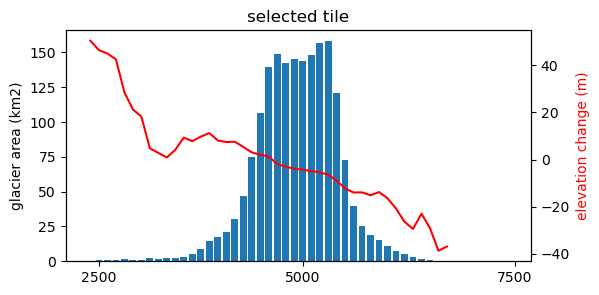

In [202]:
fig = plt.figure(figsize=(6,3))
ax1 = fig.add_subplot(111) # Create matplotlib axes
ax1.set_ylabel('glacier area (km2)')
ax1.bar(range(len(gla_area_bins_pd.iloc[0].keys())), gla_area_bins_pd.iloc[0].values)
ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax.
ax2.set_ylabel('elevation change (m)', color='red')
ax2.plot(mean_dif_bins_pd.loc['2007'], 'r')
plt.xticks([1, 25, 50], [2500, 5000, 7500])
plt.xlabel('elevation (m)')
plt.title('selected tile')


### 2. Read and visualize the glacier elevation change on the overall setp region.


In [203]:
mean_dif_tiles, std_dif_tiles = {}, {}
with h5py.File(paths_stat_dems, "r") as f:
  for tile_id in list(f.keys()):
    mean_dif_tile = f[tile_id + '/mean_dif_tile'][:]
    std_dif_tile = f[tile_id + '/std_dif_tile'][:]
    mean_dif_tiles[tile_id] = mean_dif_tile
    std_dif_tiles[tile_id] = std_dif_tile
mean_dif_tiles_pd = pd.DataFrame(mean_dif_tiles, index=years)
std_dif_tiles_pd = pd.DataFrame(std_dif_tiles, index=years)
mean_dif_tiles_pd.head()
std_dif_tiles_pd.head()
mean_dif_setp = mean_dif_tiles_pd.mean(axis=1)
std_dif_setp = std_dif_tiles_pd.mean(axis=1)


Text(0.5, 1.0, 'selected tile/overall setp')

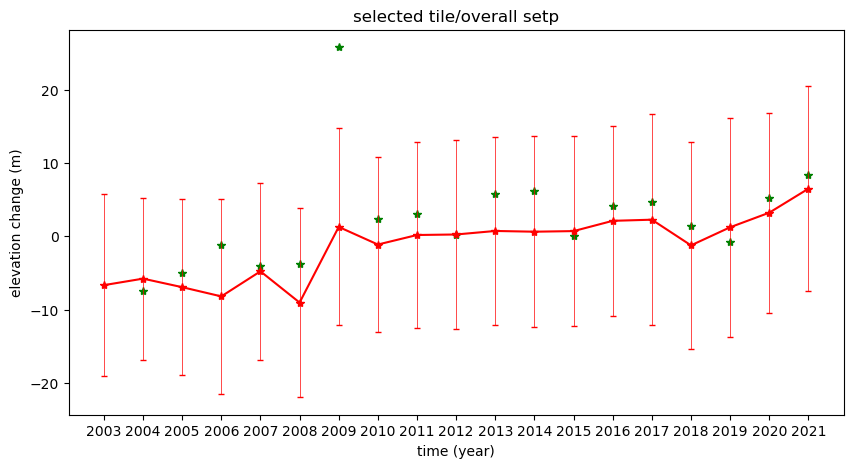

In [204]:
plt.figure(figsize=(10,5))
plt.plot(mean_dif_tiles_pd['tile_29_96'], 'g*')
plt.plot(mean_dif_setp, 'r*')
plt.errorbar(mean_dif_setp.index, mean_dif_setp.values, \
                        yerr=std_dif_setp.values/2, color='r', elinewidth=0.5,capsize=2)
plt.ylabel('elevation change (m)'); plt.xlabel('time (year)')
plt.title('selected tile/overall setp')
